In [15]:
from math import log2
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

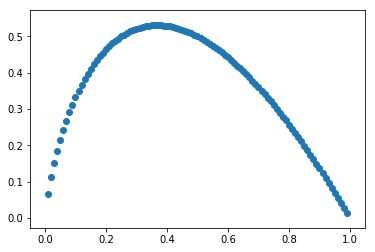

In [30]:
H = []
xs = []
for i in range(1, 100):
    x = 1 - i/100
    H.append(x*log2(1/x))
    xs.append(x)
plt.scatter(xs,H)
plt.show()

In [128]:
for i in range(1,20):
    prob1 = i/20
    prob2 = (20-i)/20
    H = -1*(prob1*(log2(prob1)) + prob2*(log2(prob2)))
    print(i,H)
# OOOOOH I get it now!

1 0.28639695711595625
2 0.4689955935892812
3 0.6098403047164004
4 0.7219280948873623
5 0.8112781244591328
6 0.8812908992306927
7 0.934068055375491
8 0.9709505944546686
9 0.9927744539878083
10 1.0
11 0.9927744539878083
12 0.9709505944546686
13 0.934068055375491
14 0.8812908992306927
15 0.8112781244591328
16 0.7219280948873623
17 0.6098403047164004
18 0.4689955935892812
19 0.28639695711595625


In [97]:
students = pd.DataFrame()
students['male'] = [1,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0]
students['height'] = [2,2,2,1,1,1,1,1,1,1,0,0,0,0,0,2,1,0,2,0]
students['pairs'] = [1,0,1,2,1,2,2,0,1,2,2,1,2,1,0,0,0,2,0,1] 

In [121]:
students

,male,height,pairs
0,1,2,1
1,1,2,0
2,0,2,1
3,0,1,2
4,1,1,1
5,1,1,2
6,1,1,2
7,1,1,0
8,1,1,1
9,0,1,2


In [185]:
# This only works on 2 outcome data where 1 of the 2 possible values is the number '1'
def entropy(data, target):
    if len(data) == 0:
        return 0
    prob1 = len(data[data[target] == 1])/len(data)
    prob2 = 1-prob1
    if (prob1 > 0) and (prob2 > 0):
        return prob1*(log2(1/prob1)) + prob2*(log2(1/prob2))
    else:
        return 0

In [186]:
def entropyavg(data, attribute, value, target):
    x1 = entropy(data[data[attribute] == value], target)
    x2 = entropy(data[data[attribute] != value], target)
    return (x1 * len(data[data[attribute] == value]) + x2 * len(data[data[attribute] != value]))/len(data)

In [187]:
def gain(data, target):
    
    dict1 = {}
    for column in data:
        if column != target:
            for value in data[column].unique():
                dict1[str(column) + ' ' +str(value)] = entropyavg(data,column,value,target)
    for i in dict1:
        if dict1[i] == min(dict1.values()):
            return str(i) + ' ' + str(min(dict1.values()))

In [188]:
gain(students, 'male')

'pairs 0 0.689659695223976'

In [213]:
def tree(data, target, recursion):
    master_tree = [entropy(data, target)]
    if recursion == 4:
        return master_tree
    recursion += 1
    master_tree = [entropy(data, target)]
    if (len(data[data[target] == 1]) == len(data)) or (len(data[data[target] == 0]) == len(data)):
        return master_tree
    else:
        column = gain(data, target).split()[0]
        value = gain(data, target).split()[1]
        gini = gain(data, target).split()[2]
        master_tree.append([tree(data[data[column] == int(value)], target, recursion) , column, value])
        master_tree.append([tree(data[data[column] != int(value)], target, recursion) , column, value])
        return master_tree

In [214]:
tree(students, 'male', 0)

[0.9709505944546687,
 [[0], 'pairs', '0'],
 [[0.9852281360342514,
   [[0.6500224216483541,
     [[0], 'pairs', '2'],
     [[0.9182958340544893,
       [[0.9182958340544893], 'height', '0'],
       [[0], 'height', '0']],
      'pairs',
      '2']],
    'height',
    '0'],
   [[0.9544340029249649,
     [[0.8112781244591328, [[1.0], 'height', '2'], [[0], 'height', '2']],
      'pairs',
      '1'],
     [[1.0, [[1.0], 'height', '1'], [[0], 'height', '1']], 'pairs', '1']],
    'height',
    '0']],
  'pairs',
  '0']]